<a href="https://colab.research.google.com/github/minhduc01168/ET_Tri_tue_nhan_tao/blob/master/BTL_AI_ANN_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the dataset
df = pd.read_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_normalization.csv')

In [ ]:
X = pd.DataFrame(df)
X = X.drop(['loan_status'], axis=1)
y = df[['loan_status']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29998 non-null  float64
 1   person_income               29998 non-null  float64
 2   person_home_ownership       29998 non-null  float64
 3   person_emp_length           29998 non-null  float64
 4   loan_intent                 29998 non-null  float64
 5   loan_grade                  29998 non-null  float64
 6   loan_amnt                   29998 non-null  float64
 7   loan_int_rate               29998 non-null  float64
 8   loan_percent_income         29998 non-null  float64
 9   cb_person_default_on_file   29998 non-null  float64
 10  cb_person_cred_hist_length  29998 non-null  float64
dtypes: float64(11)
memory usage: 2.5 MB


In [ ]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
# X_train , X_test , y_train , y_test = train_test_split (X, y, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16, random_state=1)

In [ ]:
print("-----------------------")
print(X_train.shape)
print(y_train.shape)
print("-----------------------")
print(X_test.shape)
print(y_test.shape)
print("-----------------------")

-----------------------
(23938, 11)
(23938, 1)
-----------------------
(1500, 11)
(1500, 1)
-----------------------


In [ ]:
# Make the ANN!
# Importing the Keras libraries and packages
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Initialize Sequential object
ann = tf.keras.models.Sequential()

# Total no. of Neurons = 6
# We will be adding 2 hidden layers in our Neural Network
ann.add(tf.keras.layers.Dense(units=11, activation='relu',input_dim = np.shape( X_test )[1]))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
# Adding Output Later
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Initializing our Compiler
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train our model
# ann.fit(X_train, y_train, batch_size=128, epochs=150, verbose=1)
history = ann.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val))
# batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

Epoch 1/150
749/749 [==============================] - 7s 7ms/step - loss: 0.4507 - accuracy: 0.7907 - val_loss: 0.3757 - val_accuracy: 0.8461
Epoch 2/150
749/749 [==============================] - 5s 6ms/step - loss: 0.3822 - accuracy: 0.8436 - val_loss: 0.3612 - val_accuracy: 0.8564
Epoch 3/150
749/749 [==============================] - 5s 7ms/step - loss: 0.3732 - accuracy: 0.8494 - val_loss: 0.3592 - val_accuracy: 0.8546
Epoch 4/150
749/749 [==============================] - 3s 4ms/step - loss: 0.3636 - accuracy: 0.8538 - val_loss: 0.3502 - val_accuracy: 0.8621
Epoch 5/150
749/749 [==============================] - 3s 3ms/step - loss: 0.3544 - accuracy: 0.8614 - val_loss: 0.3391 - val_accuracy: 0.8669
Epoch 6/150
749/749 [==============================] - 3s 4ms/step - loss: 0.3474 - accuracy: 0.8652 - val_loss: 0.3353 - val_accuracy: 0.8713
Epoch 7/150
749/749 [==============================] - 3s 4ms/step - loss: 0.3406 - accuracy: 0.8681 - val_loss: 0.3248 - val_accuracy: 0.8754

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


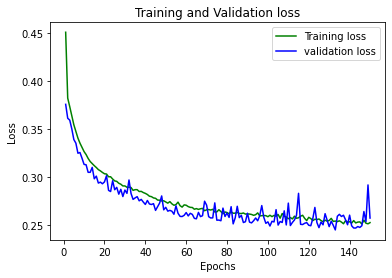

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

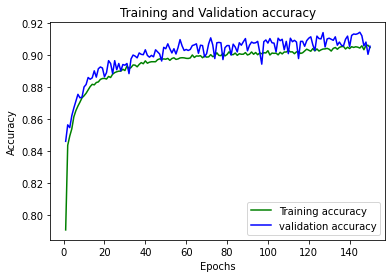

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)   # This will predict output values as 'True' and 'False'

47/47 [==============================] - 0s 2ms/step


In [ ]:
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)

# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
print(cm)
accuracy_score(y_test, y_prediction)

[[1162   52]
 [  83  203]]


0.91

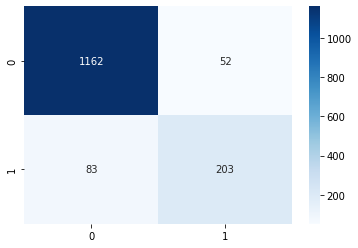

In [ ]:
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')